# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("reg_data.csv")

In [3]:
assert df.shape == (100,2)

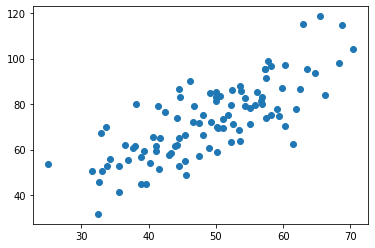

In [31]:
plt.scatter(df.X,df.Y)

In [9]:
# YOUR CODE HERE
x_train = df.X[0:80]
x_test = df.X[80:]
y_train = df.Y[0:80]
y_test = df.Y[80:]


In [10]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

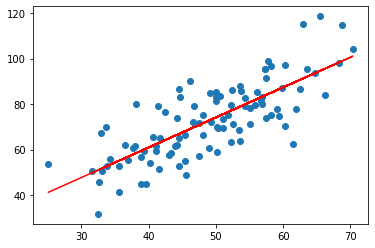

In [127]:
#implement a least squares function to find a, b

"""x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0
print(b)
print(a)
"""

# YOUR CODE HERE

x_mean = df.X.mean()
y_mean = df.Y.mean()


xi = df.X-x_mean
yi = df.Y-y_mean

b = sum(xi*yi) / sum(xi**2)

a = y_mean - b*x_mean


df["y"] = a + b*df.X

plt.scatter(df.X,df.Y)
plt.plot(df.X,df["y"], color="red")




In [67]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

'assert abs(a +3*b - 11.69) <= 0.05\nassert abs(a +100*b - 140) <= 1'

In [99]:
df["Classifier"] = df["Y"]-df["y"]

df["Class"] = 0

Class = []

for v in df["Classifier"]:
    if v < 0:
        Class.append("0")
    else:
        Class.append("1")

df["Class"] = Class

df

,X,Y,y,Classifier,Class
0,32.502345,31.707006,50.973131,-19.266125,0
1,53.426804,68.777596,78.644284,-9.866688,0
2,61.530358,62.562382,89.360675,-26.798293,0
3,47.475640,71.546632,70.774280,0.772353,1
4,59.813208,87.230925,87.089863,0.141062,1
...,...,...,...,...,...
95,50.030174,81.536991,74.152476,7.384515,1
96,49.239765,72.111832,73.107214,-0.995382,0
97,50.039576,85.232007,74.164909,11.067099,1
98,48.149859,66.224958,71.665888,-5.440930,0


In [112]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0

# YOUR CODE HERE

class_0 = df["X"][df["Classifier"] <0].tolist()
class_1 = df["X"][df["Classifier"] >0].tolist()
        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(55,)
(45,)


In [ ]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [143]:
# get the total error for the classes



err = 0
# YOUR CODE HERE

Accuracy = sum((df["y"] - df["y"].mean())**2) / sum((df["Y"] - df["Y"].mean())**2)

err = 1 - Accuracy 

err


0.4013442084613368

In [144]:
assert err - 201 < 20